<a href="https://colab.research.google.com/github/Surajpatel2003/ADS-Lab/blob/main/ADS_LAB2_Suraj_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("/content/heart_disease_uci.csv")
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
data.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Handle missing values in dataset

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# List of numerical columns and categorical columns
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
cat_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Apply the imputers
data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [ ]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0.0
1,2,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2.0
2,3,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1.0
3,4,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0.0
4,5,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0.0


In [ ]:
data.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Outliers in dataset

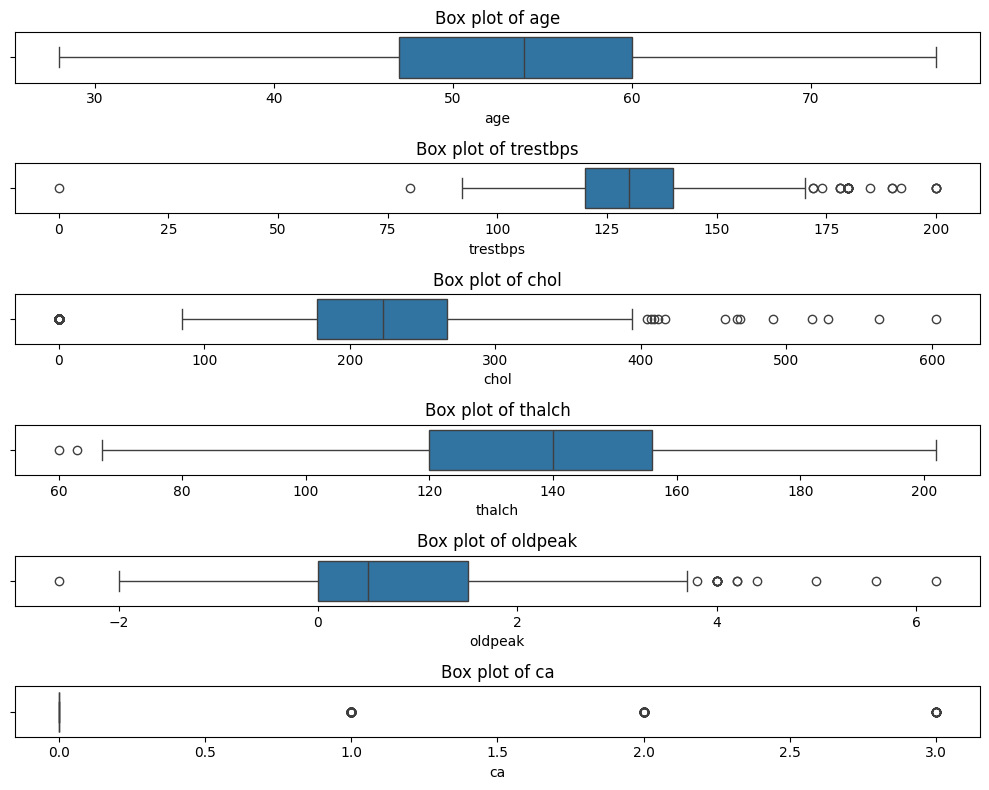

In [ ]:
# List of numerical features
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

plt.figure(figsize=(10, 8))

for i, feature in enumerate(num_features):
    plt.subplot(len(num_features), 1, i+1)
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')


plt.tight_layout()
plt.show()

### Top 5 attributes

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X = data.drop('num', axis=1)
y = data['num']

X = pd.get_dummies(X)

# Fit the model
model = RandomForestClassifier(random_state=1)
model.fit(X, y)

RandomForestClassifier(random_state=1)

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Get top 5 features
top_5_features = feature_importances.head(5)

top_5_features

,feature,importance
0,id,0.194834
1,age,0.088008
4,thalch,0.085101
3,chol,0.077644
5,oldpeak,0.077224


Add 20% synthetic data

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X = data.drop('num', axis=1)
y = data['num']


le = LabelEncoder()
X = X.apply(le.fit_transform)

# Get the counts of each class
counter = Counter(y)

# Calculate the number of samples for each class
# This will increase the size of the dataset by 20%
sampling_strategy = {class_: int(count * 1.2) for class_, count in counter.items()}

# Create a SMOTE object
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=1)

X_res, y_res = smote.fit_resample(X, y)

# Now X_res and y_res have 20% more data


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 0.0 will be larger than the number of samples in the majority class (class #0.0 -> 411)
  warnings.warn(


In [ ]:
# Assuming data_2 is your existing DataFrame
data_2 = pd.concat([data, pd.DataFrame(X_res, columns=data.columns)], ignore_index=True)
data_2

<ipython-input-34-3a2e2a0bbbb9>:2: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  data_2 = pd.concat([data, pd.DataFrame(X_res, columns=data.columns)], ignore_index=True)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0.0
1,2,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2.0
2,3,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1.0
3,4,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0.0
4,5,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,145,28.0,0,0,0,47.0,156.0,0,0,73.0,0,24.0,1,1.0,2,NaN
2018,642,25.0,1,2,0,20.0,0.0,0,1,22.0,0,13.0,1,0.0,0,NaN
2019,891,31.0,1,3,0,42.0,89.0,1,2,46.0,0,29.0,1,0.0,1,NaN
2020,861,43.0,1,3,1,25.0,97.0,0,0,55.0,0,38.0,0,0.0,1,NaN


In [ ]:
len(data_2)

2022